In [1]:
import xarray as xr

# Abrir archivo NetCDF
ds = xr.open_dataset('datos/temps/NETCDF4_LSASAF_MSG_LST_MSG-Disk_202505221700.nc')

# Ver contenido
print(ds)

<xarray.Dataset>
Dimensions:         (time: 1, lat: 3201, lon: 3201)
Coordinates:
  * lat             (lat) float32 80.0 79.95 79.9 79.85 ... -79.9 -79.95 -80.0
  * lon             (lon) float32 -80.0 -79.95 -79.9 -79.85 ... 79.9 79.95 80.0
  * time            (time) datetime64[ns] 2025-05-22T17:00:00
Data variables:
    LST             (time, lat, lon) float32 ...
    crs             |S1 ...
    delta_LST0_KHS  (time, lat, lon) float32 ...
    quality_flag    (time, lat, lon) float32 ...
    standard_error  (time, lat, lon) float32 ...
Attributes: (12/29)
    date_created:               2025-05-22T17:17:45Z
    algorithm_version:          2.0.0
    base_algorithm_version:     8.0.2
    processing_level:           02
    platform:                   MSG3
    sensor:                     SEVI
    ...                         ...
    geospatial_lat_units:       degrees_north
    geospatial_lon_units:       degrees_east
    keywords:                   Earth Science, Land Surface, Land Temper

In [2]:
print(ds['LST'])

<xarray.DataArray 'LST' (time: 1, lat: 3201, lon: 3201)>
[10246401 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 80.0 79.95 79.9 79.85 ... -79.85 -79.9 -79.95 -80.0
  * lon      (lon) float32 -80.0 -79.95 -79.9 -79.85 ... 79.85 79.9 79.95 80.0
  * time     (time) datetime64[ns] 2025-05-22T17:00:00
Attributes:
    long_name:     LST
    units:         Celsius
    grid_mapping:  crs
    valid_min:     -8000
    valid_max:     7000


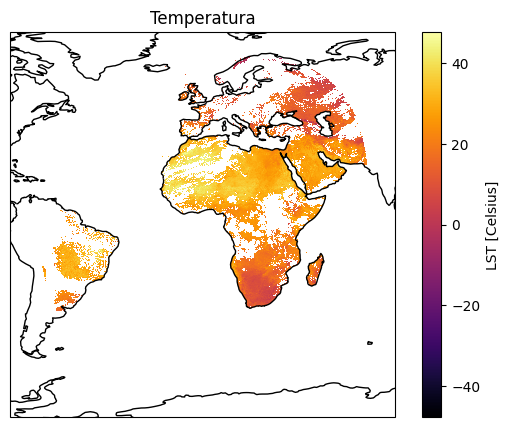

In [3]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

temp = ds['LST']

fig = plt.figure(figsize=(7,5))
ax = plt.axes(projection=ccrs.PlateCarree())
temp.isel(time=0).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='inferno')
ax.coastlines()
plt.title('Temperatura')
plt.show()


In [4]:
# Seleccionar el punto más cercano
punto = ds.sel(lat=-21, lon=-55, method='nearest')

# Mostrar los valores
print("Temperatura en Sidrolandia (°C):", punto['LST'].values[0])

Temperatura en Sidrolandia (°C): 28.96


Según https://www.accuweather.com/es/br/sidrol%C3%A2ndia/38822/current-weather/38822

### 29°

In [5]:
import xarray as xr
import glob

# Ruta
path = "./datos/temps/"
files = sorted(glob.glob(f"{path}*.nc"))

glob es un módulo estándar de Python que se usa para buscar archivos y directorios usando patrones comodín (wildcards), como *.nc, *.txt, *.csv, etc.


In [6]:
for f in files:
    print(f)

./datos/temps/NETCDF4_LSASAF_MSG_LST_MSG-Disk_202505220000.nc
./datos/temps/NETCDF4_LSASAF_MSG_LST_MSG-Disk_202505220100.nc
./datos/temps/NETCDF4_LSASAF_MSG_LST_MSG-Disk_202505220200.nc
./datos/temps/NETCDF4_LSASAF_MSG_LST_MSG-Disk_202505220300.nc
./datos/temps/NETCDF4_LSASAF_MSG_LST_MSG-Disk_202505220400.nc
./datos/temps/NETCDF4_LSASAF_MSG_LST_MSG-Disk_202505220500.nc
./datos/temps/NETCDF4_LSASAF_MSG_LST_MSG-Disk_202505220600.nc
./datos/temps/NETCDF4_LSASAF_MSG_LST_MSG-Disk_202505220700.nc
./datos/temps/NETCDF4_LSASAF_MSG_LST_MSG-Disk_202505220800.nc
./datos/temps/NETCDF4_LSASAF_MSG_LST_MSG-Disk_202505220900.nc
./datos/temps/NETCDF4_LSASAF_MSG_LST_MSG-Disk_202505221000.nc
./datos/temps/NETCDF4_LSASAF_MSG_LST_MSG-Disk_202505221100.nc
./datos/temps/NETCDF4_LSASAF_MSG_LST_MSG-Disk_202505221200.nc
./datos/temps/NETCDF4_LSASAF_MSG_LST_MSG-Disk_202505221300.nc
./datos/temps/NETCDF4_LSASAF_MSG_LST_MSG-Disk_202505221400.nc
./datos/temps/NETCDF4_LSASAF_MSG_LST_MSG-Disk_202505221500.nc
./datos/

In [7]:
lat_sidro = -21.0
lon_sidro = -55.0

# Lista para guardar valores
lst_values = []

for f in files:
    ds = xr.open_dataset(f)
    lst = ds['LST'].sel(lat=lat_sidro, lon=lon_sidro, method='nearest')
    lst_values.append(lst)
    
# Concatenar todos los datos por tiempo
combined = xr.concat(lst_values, dim='time')

# Ver resultado
print(combined)


<xarray.DataArray 'LST' (time: 18)>
array([16.35    , 16.26    , 15.88    , 14.45    , 14.65    , 13.65    ,
       12.309999, 12.309999, 12.82    , 11.349999, 11.73    , 16.91    ,
       22.199999, 25.72    , 28.38    , 29.529999, 29.16    , 28.96    ],
      dtype=float32)
Coordinates:
    lat      float32 -21.0
    lon      float32 -55.0
  * time     (time) datetime64[ns] 2025-05-22 ... 2025-05-22T17:00:00
Attributes:
    long_name:     LST
    units:         Celsius
    grid_mapping:  crs
    valid_min:     -8000
    valid_max:     7000


### OJO! Para el siguiente método debe estar instalado dask
pip install dask

In [8]:
import xarray as xr

# Ruta a los archivos descargados
path = "./datos/temps/"  



# Abrir todos los archivos NetCDF juntos
ds = xr.open_mfdataset(f"{path}*.nc", combine='by_coords')

# Seleccionar punto más cercano a Sidrolândia, MS
lat_sidro = -21.0
lon_sidro = -55.0

# Extraer la variable LST en ese punto
lst_point = ds['LST'].sel(lat=lat_sidro, lon=lon_sidro, method='nearest')

# Ver resultado
print(lst_point)

<xarray.DataArray 'LST' (time: 18)>
dask.array<getitem, shape=(18,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    lat      float32 -21.0
    lon      float32 -55.0
  * time     (time) datetime64[ns] 2025-05-22 ... 2025-05-22T17:00:00
Attributes:
    long_name:     LST
    units:         Celsius
    grid_mapping:  crs
    valid_min:     -8000
    valid_max:     7000


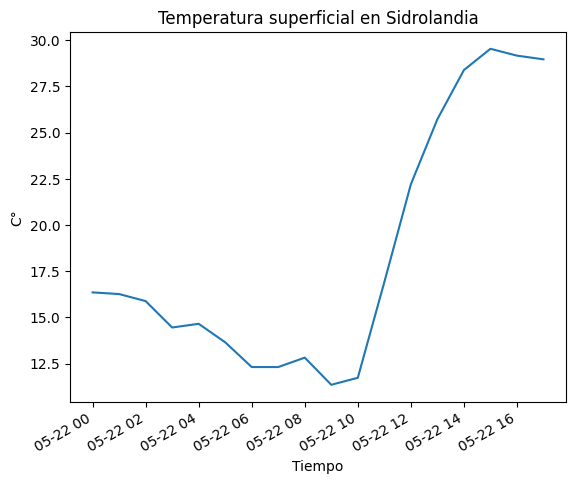

In [9]:
import matplotlib.pyplot as plt

lst_point.plot()
plt.title("Temperatura superficial en Sidrolandia")
plt.ylabel("C°")
plt.xlabel("Tiempo")
plt.show()

Muchas veces deseamos que solo sean considerados algunos archivos

In [10]:
files = [f for f in glob.glob(f"{path}*.nc") if '1100' in f or '1200' in f]

In [11]:
# Convertir a DataFrame
df = lst_point.to_dataframe().reset_index() 

# Renombrar columnas y convertir a °C
df = df.rename(columns={"LST": "t"})

# Guardar CSV
df.to_csv("datos/lst_sidrolandia.csv", index=False)

In [12]:
print(df)

                  time   lat   lon          t
0  2025-05-22 00:00:00 -21.0 -55.0  16.350000
1  2025-05-22 01:00:00 -21.0 -55.0  16.260000
2  2025-05-22 02:00:00 -21.0 -55.0  15.880000
3  2025-05-22 03:00:00 -21.0 -55.0  14.450000
4  2025-05-22 04:00:00 -21.0 -55.0  14.650000
5  2025-05-22 05:00:00 -21.0 -55.0  13.650000
6  2025-05-22 06:00:00 -21.0 -55.0  12.309999
7  2025-05-22 07:00:00 -21.0 -55.0  12.309999
8  2025-05-22 08:00:00 -21.0 -55.0  12.820000
9  2025-05-22 09:00:00 -21.0 -55.0  11.349999
10 2025-05-22 10:00:00 -21.0 -55.0  11.730000
11 2025-05-22 11:00:00 -21.0 -55.0  16.910000
12 2025-05-22 12:00:00 -21.0 -55.0  22.199999
13 2025-05-22 13:00:00 -21.0 -55.0  25.719999
14 2025-05-22 14:00:00 -21.0 -55.0  28.379999
15 2025-05-22 15:00:00 -21.0 -55.0  29.529999
16 2025-05-22 16:00:00 -21.0 -55.0  29.160000
17 2025-05-22 17:00:00 -21.0 -55.0  28.959999


### Ejercicos propuestos

1. Buscar fuentes de información que distribuyan modelos de variables ambientales para nuestra región

2. Para uno de los modelos que te interese:
- Extraer un recorte geográfico o un perfil espacial
- Extraer series temporales en un punto y convertir a DataFrame
- Analiza el comportamiento de la serie que hayas elegido en función de dos puntos cercanos